https://towardsdatascience.com/matplotlib-tutorial-lets-take-your-country-maps-to-another-level-a6bd1f40fff

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

import matplotlib.patheffects as PathEffects
from matplotlib.patches import Polygon

In [30]:
font_family = "sans"
background_color = "#D4F1F4"
text_color = "#040303"

sns.set_style({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "font.family": font_family,
    "text.color": text_color,
})

In [31]:
world = gpd.read_file("WB_Boundaries_GeoJSON_highres/WB_countries_Admin0.geojson")
world.loc[world.NAME_EN == "Seychelles", "CONTINENT"] = "Africa"
world.loc[world.NAME_EN == "Equatorial Guinea", "INCOME_GRP"] = "3. Upper middle income"

africa = world[world.CONTINENT == "Africa"].reset_index(drop=True)

disputed_areas = gpd.read_file("WB_Boundaries_GeoJSON_highres/WB_Admin0_disputed_areas.geojson")
disputed_areas = disputed_areas[disputed_areas.CONTINENT == "Africa"]

In [42]:
def draw_map(
    maps_to_draw, 
    boundry_map_index=0,
    use_hatch_for_indexes=[],
    padding={},
    labels=[],
    figsize=(40, 40)
):
    
    assert "color" in maps_to_draw[0].columns, "Missing color column in map dataframe"
    assert "edgecolor" in maps_to_draw[0].columns, "Missing edgecolor column in map dataframe"
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    
    for map_index, map_to_draw in enumerate(maps_to_draw):
        map_to_draw.plot(
            ax=ax, color=map_to_draw.color, edgecolor=map_to_draw.edgecolor,
            hatch="//" if map_index in use_hatch_for_indexes else "",
        )

    # Additional functions below this comment
    set_limits(ax, maps_to_draw[boundry_map_index], **padding)
    for label in labels:
        add_label(ax, label)
    return ax

In [43]:
world["color"] = "#f0f0f0"
world["edgecolor"] = "#c0c0c0"

africa["edgecolor"] = "#000000"
africa.loc[africa.INCOME_GRP == "5. Low income", "color"] = "#dadada"
africa.loc[africa.INCOME_GRP == "4. Lower middle income", "color"] = "#89bab2"
africa.loc[africa.INCOME_GRP == "3. Upper middle income", "color"] = "#1B998B"

disputed_areas["color"] = "#FFD6D6"
disputed_areas["edgecolor"] = "#000000"

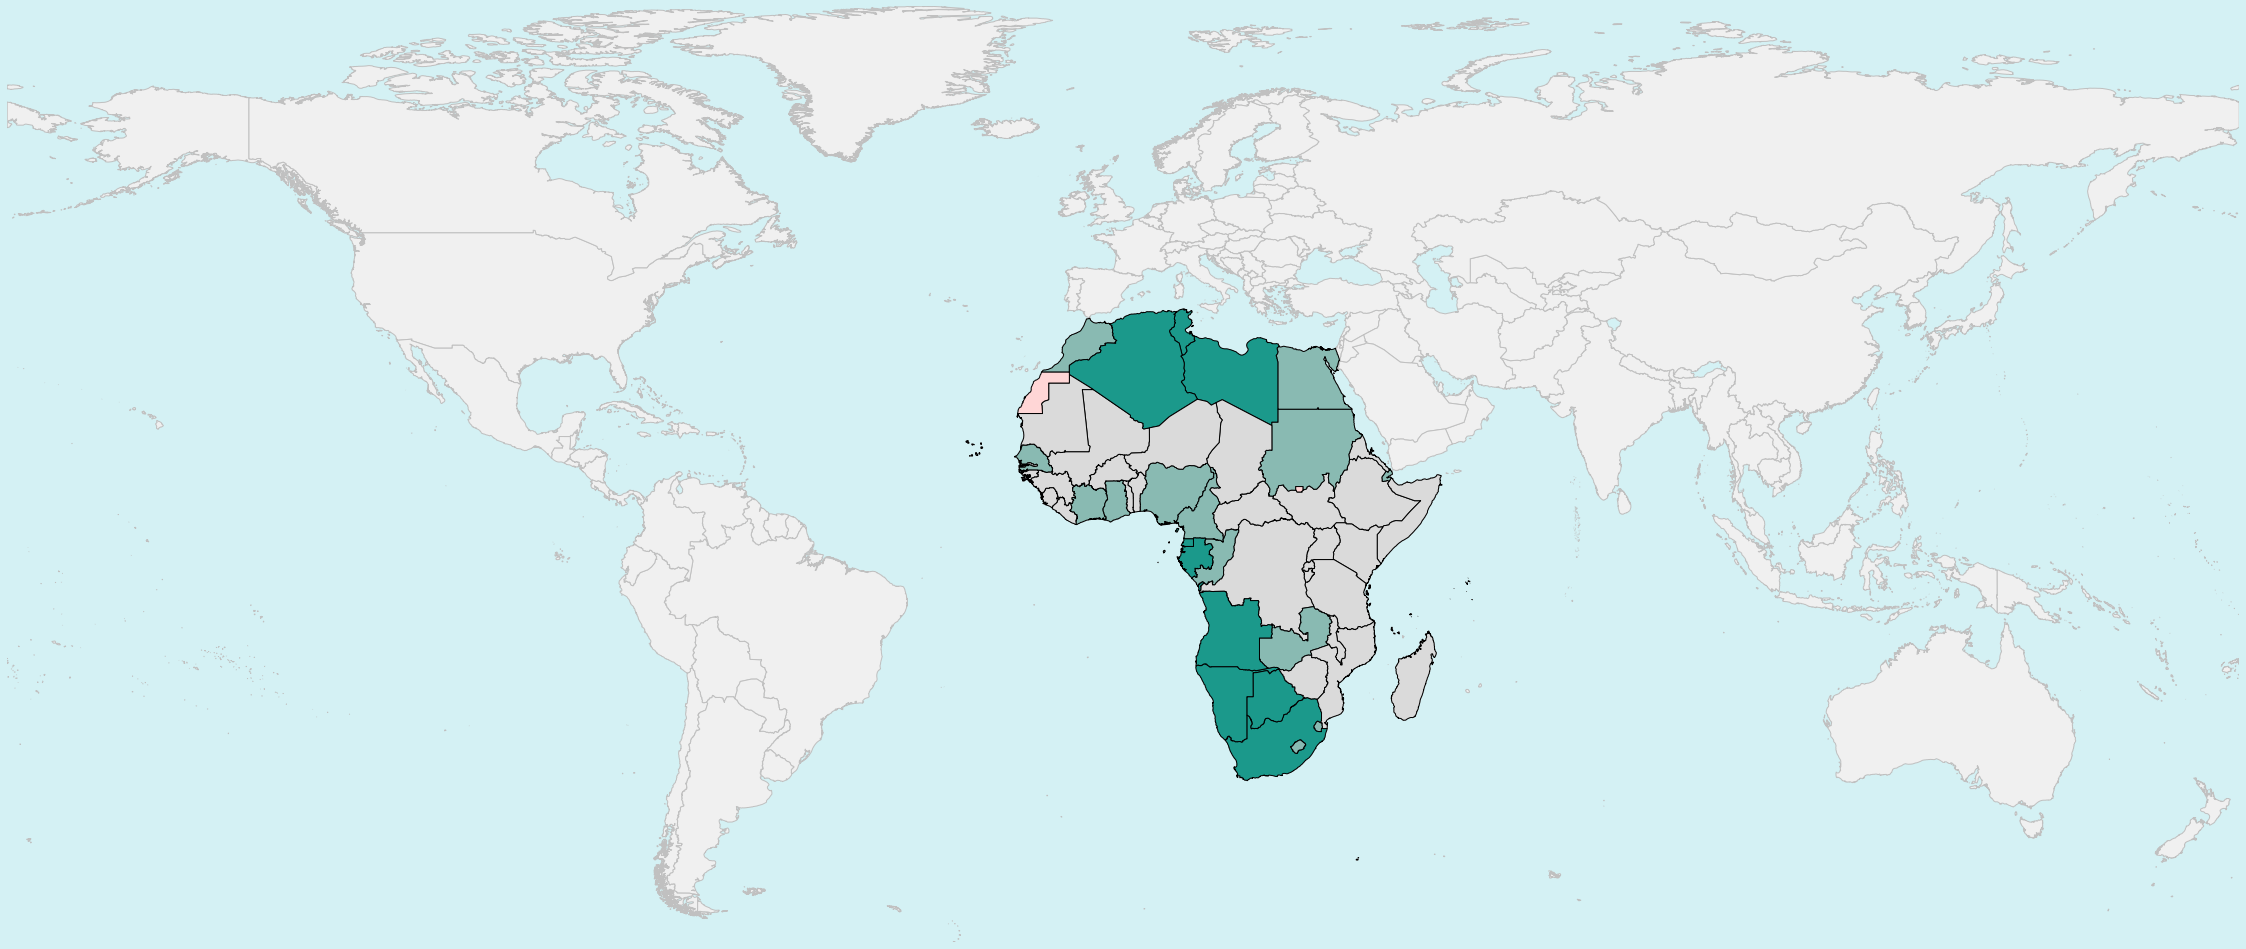

In [44]:
ax = draw_map(maps_to_draw=[world, africa, disputed_areas])

plt.axis("off")
plt.show()

In [45]:
country_labels = [
    {"label": "Algeria", "color": "#040303", "xytext": (2.0, 27.5)},
    {"label": "Angola", "color": "#040303", "xytext": (17.7, -13.1)},
    {"label": "Benin", "color": "#040303", "xytext": (3.2, 5.4), "xypin": (2.3, 7.6)},
    {"label": "Botswana", "color": "#040303", "xytext": (24.4, -22.3)},
    {"label": "Burkina\nFaso", "color": "#040303", "xytext": (-1.4, 12.6)},
    {"label": "Burundi", "color": "#040303", "xytext": (43.3, -4.9), "xypin": (29.8, -3.6)},
    {"label": "Cameroon", "color": "#040303", "xytext": (12.5, 5.2)},
    {"label": "Cape Verde", "color": "#040303", "xytext": (-23.7, 19), "xypin": (-23.7, 16)},
    {"label": "Central African\nRepublic", "color": "#040303", "xytext": (21.1, 6.5)},
    {"label": "Chad", "color": "#040303", "xytext": (18.5, 16.0)},
    {"label": "Comoros", "color": "#040303", "xytext": (46.8, -9.6), "xypin": (43.3, -11.7)},
    {"label": "Cote\nd'Ivoire", "color": "#040303", "xytext": (-5.5, 8.5)},
    {"label": "Democratic\nRepublic of\nthe Congo", "color": "#040303", "xytext": (23.3, -2.7)},
    {"label": "Djibouti", "color": "#040303", "xytext": (47.0, 13.4), "xypin": (43.0, 12.2)},
    {"label": "Egypt", "color": "#040303", "xytext": (29.2, 26.6)},
    {"label": "Equatorial\nGuinea", "color": "#040303", "xytext": (5.9, -2.5), "xypin": (10.5, 1.6)},
    {"label": "Eritrea", "color": "#040303", "xytext": (43.0, 16.9), "xypin": (38.5, 16.2)},
    {"label": "Lesotho", "color": "#040303", "xytext": (35.0, -31.0), "xypin": (28.4, -29.5)},
    {"label": "Ethiopia", "color": "#040303", "xytext": (39.9, 8.5)},
    {"label": "Gabon", "color": "#040303", "xytext": (11.8, -0.7)},
    {"label": "Ghana", "color": "#040303", "xytext": (-1.3, 6.6)},
    {"label": "Guinea", "color": "#040303", "xytext": (-11.6, 11.0)},
    {"label": "Guinea-\nBissau", "color": "#040303", "xytext": (-20.3, 10.3), "xypin": (-14.5, 12.2)},
    {"label": "Kenya", "color": "#040303", "xytext": (37.9, 0.5)},
    {"label": "Eswantini", "color": "#040303", "xytext": (35.5, -29.3), "xypin": (31.5, -26.8)},
    {"label": "Liberia", "color": "#040303", "xytext": (-10.6, 3.6), "xypin": (-9.6, 6.7)},
    {"label": "Libya", "color": "#040303", "xytext": (17.5, 27.5)},
    {"label": "Madagascar", "color": "#040303", "xytext": (46.7, -19.6)},
    {"label": "Malawi", "color": "#040303", "xytext": (38.9, -21.3), "xypin": (35.0, -15.6)},
    {"label": "Mali", "color": "#040303", "xytext": (-1.9, 17.8)},
    {"label": "Mauritania", "color": "#040303", "xytext": (-11.1, 19.6)},
    {"label": "Morocco", "color": "#040303", "xytext": (-6.9, 31.3)},
    {"label": "Mozambique", "color": "#040303", "xytext": (40.8, -15.2)},
    {"label": "Namibia", "color": "#040303", "xytext": (17.3, -20.7)},
    {"label": "Niger", "color": "#040303", "xytext": (9.8, 17.5)},
    {"label": "Nigera", "color": "#040303", "xytext": (7.8, 9.8)},
    {"label": "Republic of\nthe Congo", "color": "#040303", "xytext": (7.8, -7.2), "xypin": (12.0, -4.1)},
    {"label": "Rwanda", "color": "#040303", "xytext": (43.8, -3.6), "xypin": (30.1, -2.0)},
    {"label": "São Tomé and\nPríncipe", "color": "#040303", "xytext": (-0.9, 0.2), "xypin": (6.8, 0.2)},
    {"label": "Senegal", "color": "#040303", "xytext": (-15.0, 14.7)},
    {"label": "Seychelles", "color": "#040303", "xytext": (55.6, -2), "xypin": (55.6, -4.5)},
    {"label": "Sierra Leone", "color": "#040303", "xytext": (-16.4, 6.3), "xypin": (-12.0, 8.5)},
    {"label": "Somalia", "color": "#040303", "xytext": (45.7, 2.7)},
    {"label": "South\nAfrica", "color": "#040303", "xytext": (22.4, -31.0)},
    {"label": "South\nSudan", "color": "#040303", "xytext": (30.2, 7.0)},
    {"label": "Sudan", "color": "#040303", "xytext": (29.7, 16.0)},
    {"label": "Tanzania", "color": "#040303", "xytext": (35.0, -6.7)},
    {"label": "The\nGambia", "color": "#040303", "xytext": (-20.3, 13.6), "xypin": (-15.4, 13.6)},
    {"label": "Togo", "color": "#040303", "xytext": (1.0, 4.1), "xypin": (1.0, 7.5)},
    {"label": "Tunisia", "color": "#040303", "xytext": (9.3, 38.9), "xypin": (9.3, 35.7)},
    {"label": "Uganda", "color": "#040303", "xytext": (32.6, 0.9)},
    {"label": "Zambia", "color": "#040303", "xytext": (26.1, -14.9)},
    {"label": "Zimbawe", "color": "#040303", "xytext": (29.7, -19.1)},
]

In [46]:
def set_limits(ax, data, pad_left=0, pad_right=0, pad_top=0, pad_bottom=0):
    xmin_ = data.bounds.minx.min()
    ymin_ = data.bounds.miny.min()
    xmax_ = data.bounds.maxx.max()
    ymax_ = data.bounds.maxy.max()
    
    xmin = xmin_ - pad_left * (xmax_ - xmin_)
    xmax = xmax_ + pad_right * (xmax_ - xmin_)
    ymin = ymin_ - pad_bottom * (ymax_ - ymin_)
    ymax = ymax_ + pad_top * (ymax_ - ymin_)
    
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

In [47]:
def draw_legend_geometry(ax, row, x_loc, y_loc, height):
    x = np.array(row.geometry.boundary.coords.xy[0])
    y = np.array(row.geometry.boundary.coords.xy[1])
    
    x = x - (row.geometry.centroid.x - x_loc)
    y = y - (row.geometry.centroid.y - y_loc)
    
    ratio = height / (y.max() - y.min())
    x = x * ratio + (x_loc - x_loc * ratio)
    y = y * ratio + (y_loc - y_loc * ratio)
    
    ax.add_artist(Polygon(np.stack([x, y], axis=1), facecolor=row.color, edgecolor=row.edgecolor, hatch=row.hatch))

In [48]:
def add_label(ax, label, fontsize=24, fontweight="bold", va="center", ha="center"):            
    annotation = plt.annotate(
        label["label"], 
        xy=label["xytext"] if "xypin" not in label.keys() else label["xypin"], 
        xytext=None if "xypin" not in label.keys() else label["xytext"], 
        xycoords="data", fontsize=fontsize, va=va, ha=ha,
        linespacing=1.3, color=label["color"], fontweight=fontweight, 
        arrowprops={
            "arrowstyle": "-",
            "linewidth": 2,
        })
    
    annotation.set_path_effects([PathEffects.withStroke(linewidth=6, foreground='w')])

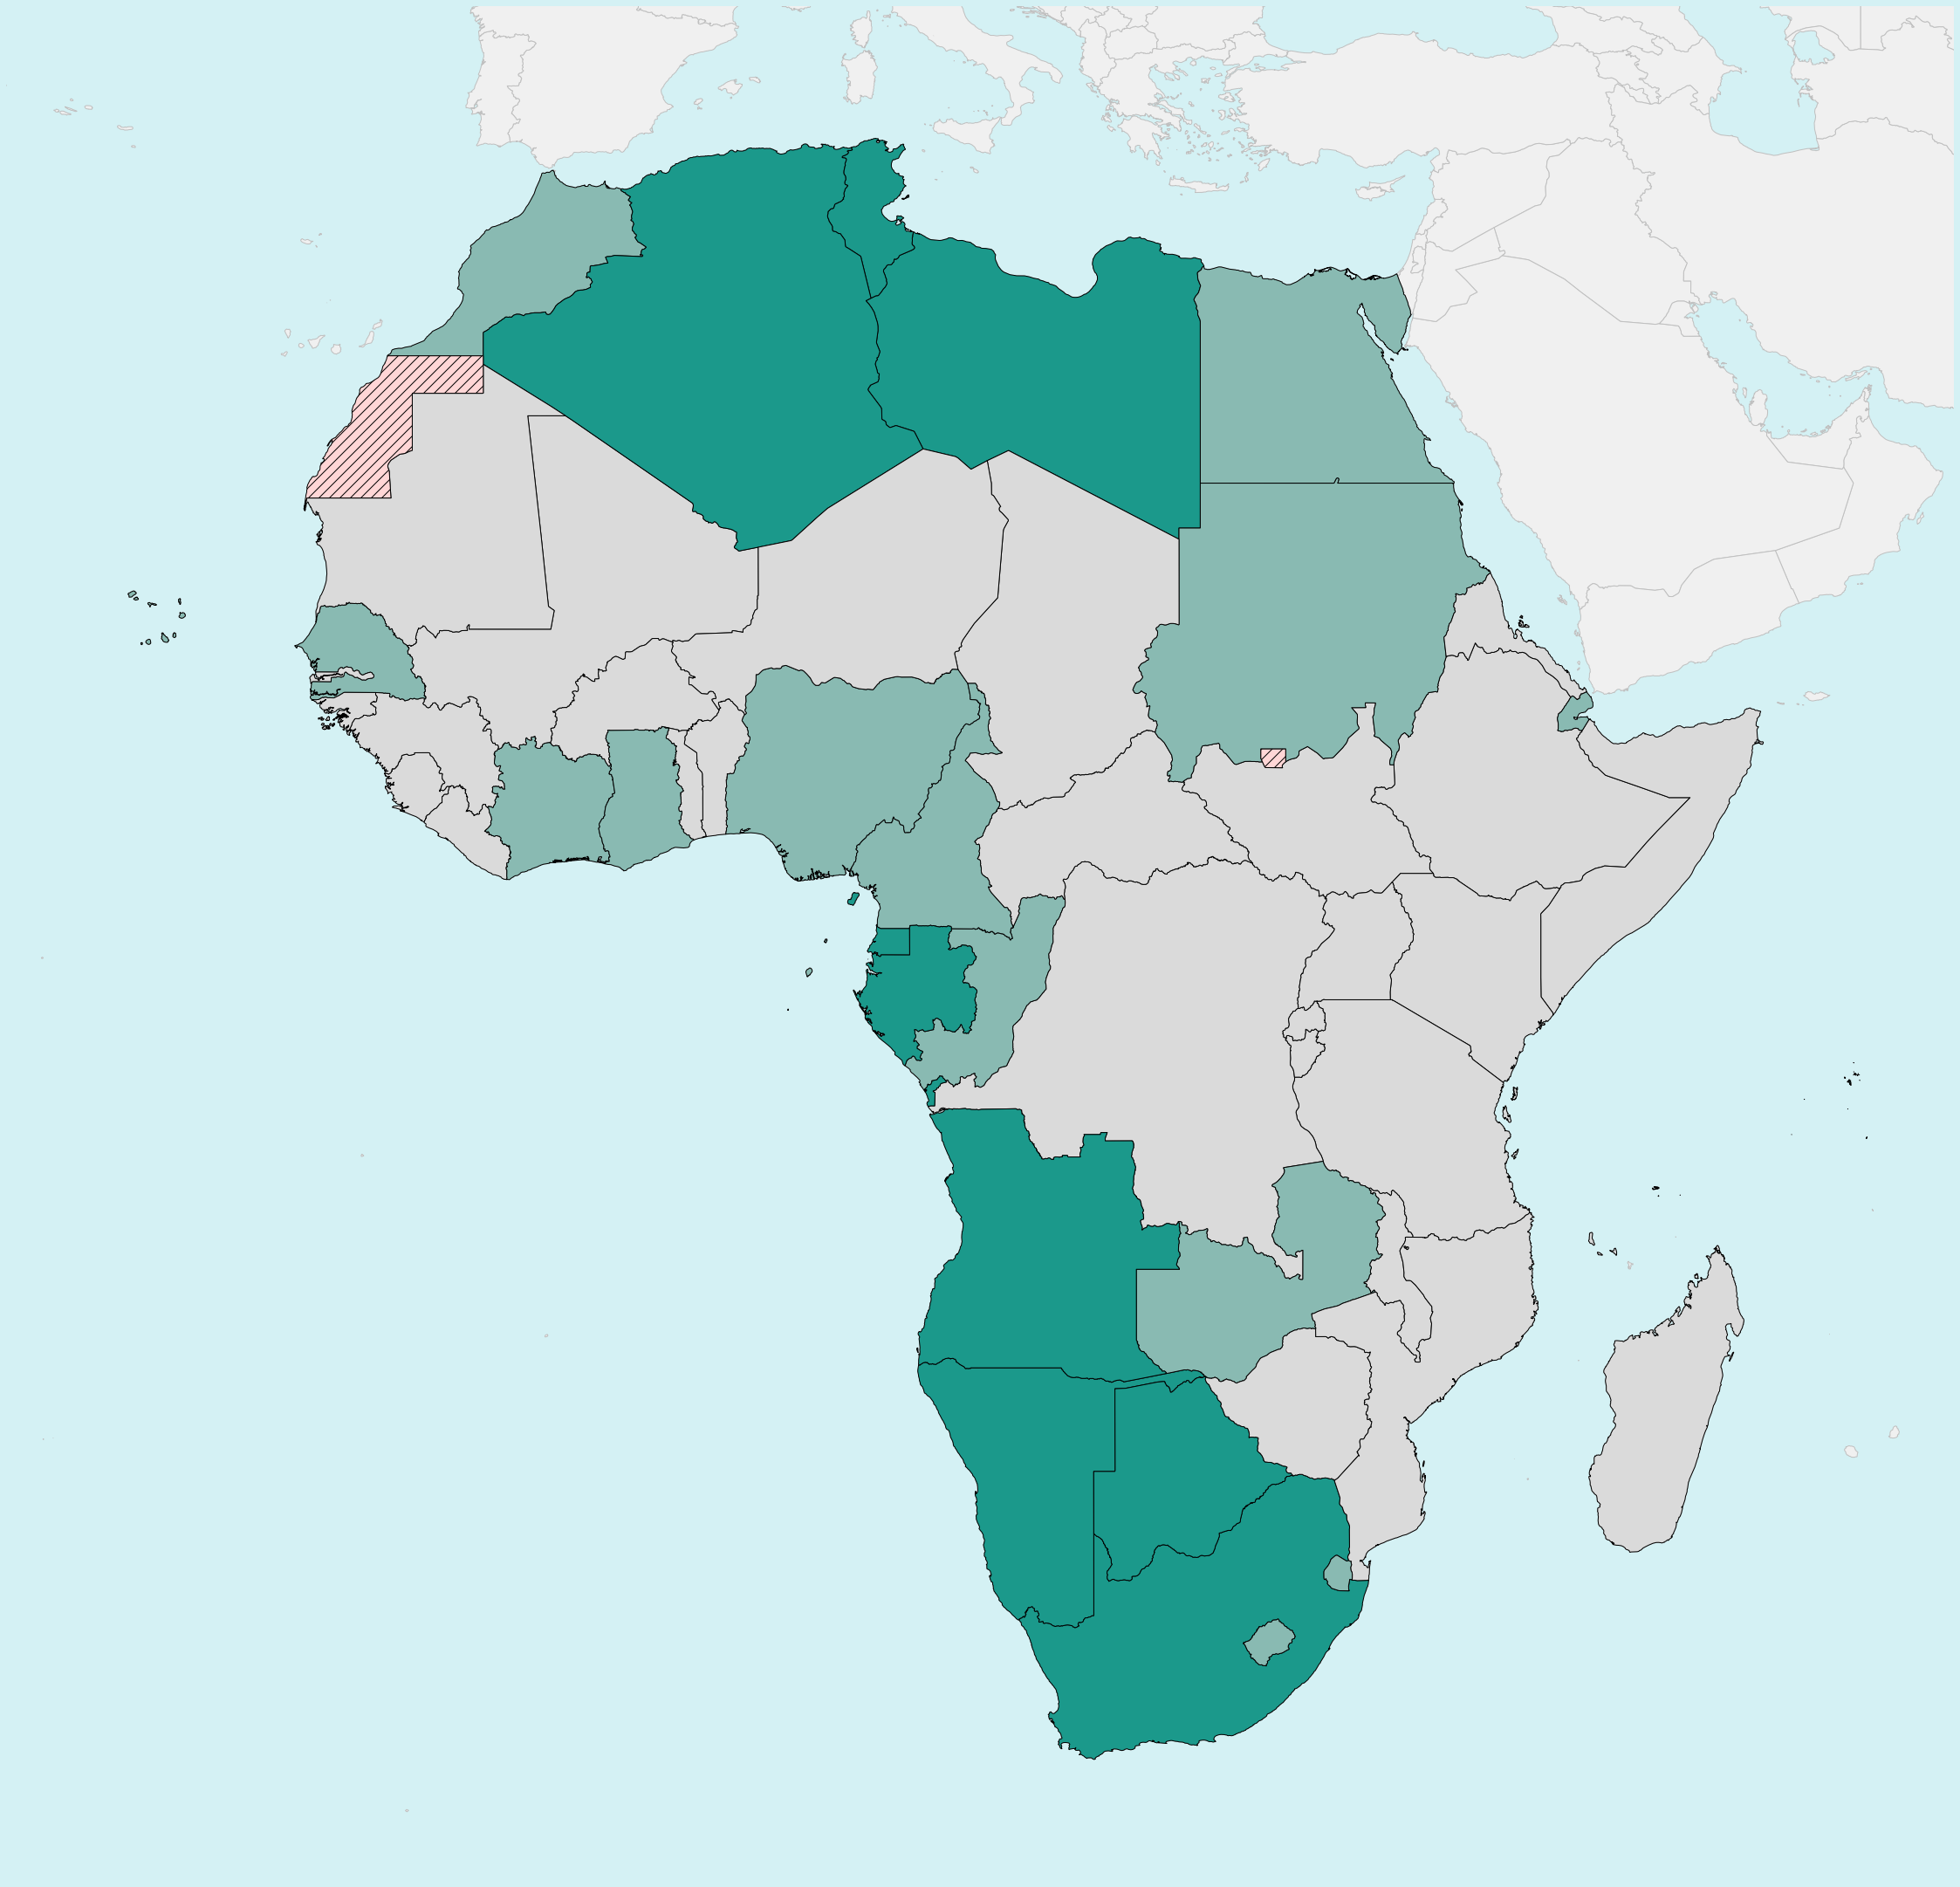

In [49]:
ax = draw_map(
    maps_to_draw=[world, africa, disputed_areas], boundry_map_index=1,
    padding={"pad_bottom": -0.08, "pad_top": 0.07, "pad_left": 0.07, "pad_right": 0.05},
    use_hatch_for_indexes=[2]
)

plt.axis("off")
plt.show()

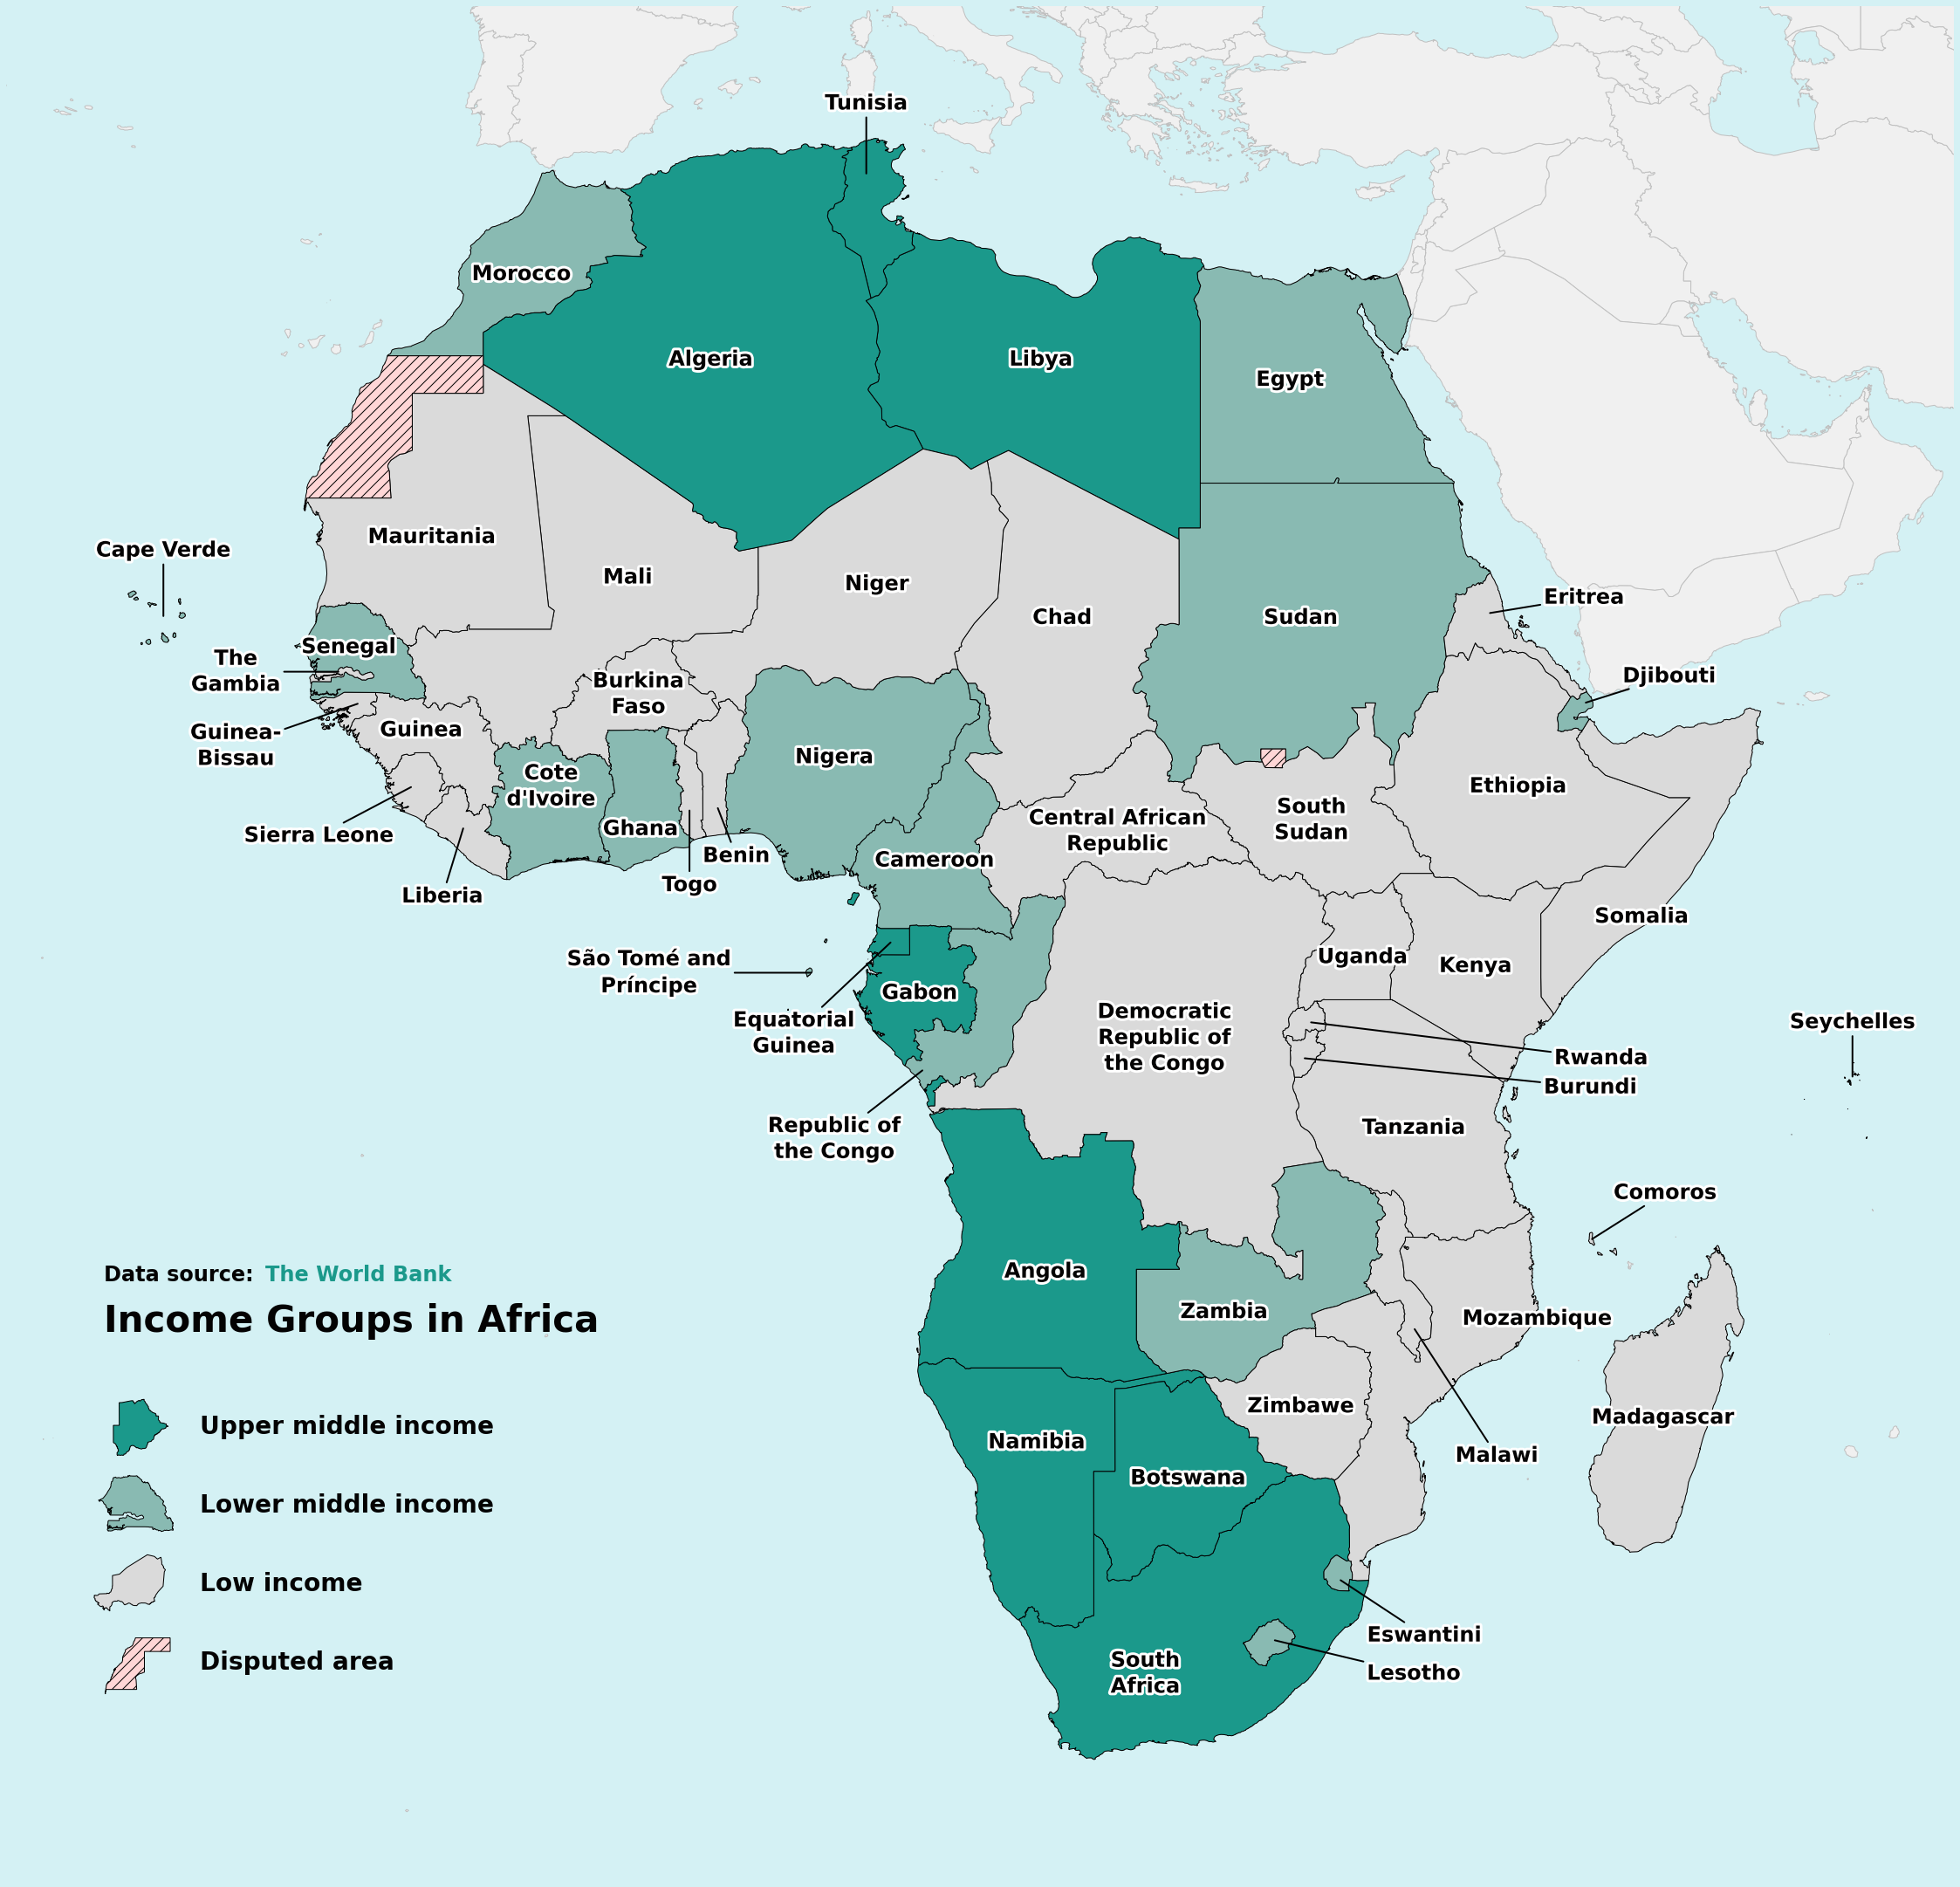

In [50]:
ax = draw_map(
    maps_to_draw=[world, africa, disputed_areas], boundry_map_index=1,
    padding={"pad_bottom": -0.08, "pad_top": 0.07, "pad_left": 0.07, "pad_right": 0.05},
    use_hatch_for_indexes=[2],
    labels=country_labels
)

legend = pd.concat([
    disputed_areas[disputed_areas.NAME_EN == "Western Sahara"],
    africa[africa.NAME_EN.isin(["Niger", "Senegal", "Botswana"])]
])

legend.loc[legend.NAME_EN == "Western Sahara", "INCOME_GRP"] = "6. Disputed area"
legend = legend.sort_values("INCOME_GRP")
legend["hatch"] = ["", "", "", "//"]

for i, row in legend.reset_index().iterrows():
    draw_legend_geometry(ax, row, -25, -20 - 3.5*i, 2.5)
    ax.annotate(row.INCOME_GRP[3:], (-22, -20 - 3.5*i), fontsize=28, fontweight="bold", va="center")

fontstyles = {"fontweight": "bold", "ha": "left"}
plt.annotate("Data source:", xy=(0.05, 0.32), fontsize=24, xycoords="axes fraction", **fontstyles)
plt.annotate("The World Bank", xy=(0.133, 0.32), fontsize=24, xycoords="axes fraction", color="#1B998B", **fontstyles)
plt.title("Income Groups in Africa", x=0.05, y=0.29, fontsize=42, **fontstyles)

plt.axis("off")
plt.show()